In [7]:
!pip install tensorflow

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [4]:
# Set directory and parameters
dataset_path = r"D:\Pbl\archive.zip\ASL_Alphabet_Dataset"
img_height, img_width = 64, 64
batch_size = 32

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


NameError: name 'ImageDataGenerator' is not defined

In [8]:
model = Sequential([
    Conv2D(128, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])
model.summary()

C:\Users\karti\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,327 (954.40 KB)

 Trainable params: 244,327 (954.40 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
epochs = 10

history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)


C:\Users\karti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 431s 611ms/step - accuracy: 0.2951 - loss: 1.7272 - val_accuracy: 0.4827 - val_loss: 1.4072
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 211s 301ms/step - accuracy: 0.7131 - loss: 0.8187 - val_accuracy: 0.5437 - val_loss: 1.2803
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 398s 569ms/step - accuracy: 0.8326 - loss: 0.4930 - val_accuracy: 0.6186 - val_loss: 1.2050
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 345s 493ms/step - accuracy: 0.8736 - loss: 0.3654 - val_accuracy: 0.6084 - val_loss: 1.3383
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 568s 812ms/step - accuracy: 0.9023 - loss: 0.2825 - val_accuracy: 0.6595 - val_loss: 1.1832
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 206s 294ms/step - accuracy: 0.9188 - loss: 0.2331 - val_accuracy: 0.6504 - val_loss: 1.3149
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 187s 267ms/step - accuracy: 0.9313 - loss: 0.1980 - val_accuracy: 0.6700 - val_loss: 1.2703
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 145s 206ms/step - accuracy: 0.9387 -

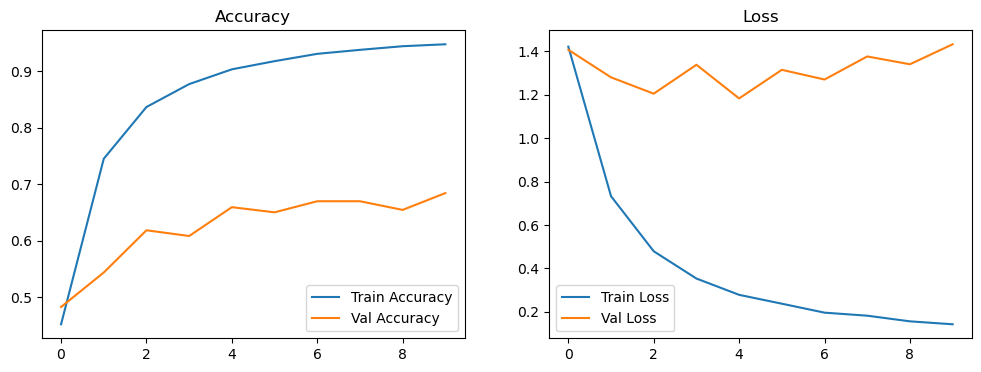

In [14]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [16]:
# Show final training & validation accuracy and loss
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Accuracy: 0.9480
Final Validation Accuracy: 0.6845
Final Training Loss: 0.1425
Final Validation Loss: 1.4327


In [19]:
model.save("sign_language_model.h5")



In [21]:
!pip install opencv-python mediapipe tensorflow


In [22]:
from tensorflow.keras.models import load_model

model = load_model("sign_language_model.h5")


In [25]:
class_names = ['1','3', '4', '5','7','8','9']

In [27]:
# Load image
import cv2
import numpy as np
img_path = r"C:\Users\karti\OneDrive\Desktop\datset\7\SEVEN_161.jpg"  # change this
img = cv2.imread(img_path)
img = cv2.resize(img, (64, 64))      # same size used in training
img = img / 255.0                    # normalize
img = np.expand_dims(img, axis=0)    # add batch dimension


In [29]:
# Make prediction
prediction = model.predict(img)
predicted_index = np.argmax(prediction)
predicted_class = class_names[predicted_index]

# Show result
print(f"Predicted Sign Language Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Predicted Sign Language Class: 7


In [ ]:
# Initialize MediaPipe for hand detection
import mediapipe as mp
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=1,
                       min_detection_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

# Open webcam
cap = cv2.VideoCapture(0)

img_height, img_width = 64, 64  # same size as model input

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip frame for mirror view and convert to RGB
    frame = cv2.flip(frame, 1)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            h, w, _ = frame.shape
            x_coords = [lm.x for lm in hand_landmarks.landmark]
            y_coords = [lm.y for lm in hand_landmarks.landmark]
            x_min = int(min(x_coords) * w)
            x_max = int(max(x_coords) * w)
            y_min = int(min(y_coords) * h)
            y_max = int(max(y_coords) * h)

            # Padding
            padding = 20
            x_min = max(0, x_min - padding)
            y_min = max(0, y_min - padding)
            x_max = min(w, x_max + padding)
            y_max = min(h, y_max + padding)

            # Extract hand region
            hand_img = frame[y_min:y_max, x_min:x_max]

            if hand_img.size > 0:
                # Resize to model input
                img = cv2.resize(hand_img, (img_width, img_height))
                img = img / 255.0
                img = np.expand_dims(img, axis=0)

                # Predict
                prediction = model.predict(img)
                predicted_class = class_names[np.argmax(prediction)]
                confidence = np.max(prediction)

                # Draw prediction
                label = f"{predicted_class} ({confidence*100:.1f}%)"
                cv2.putText(frame, label, (x_min, y_min - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Draw landmarks
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Show the frame
    cv2.imshow("Real-Time Sign Recognition", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━